In [1]:
%matplotlib inline


Constraint optimization: visualizing the geometry
==================================================

A small figure explaining optimization with constraints



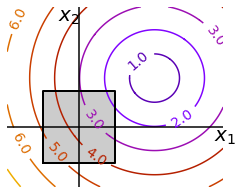

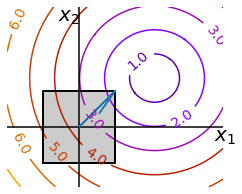

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

for i in (1, 2):
    # Create 2 figure: only the second one will have the optimization
    # path
    plt.figure(i, figsize=(3, 2.5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                        extent=[-3, 6, -2.5, 5],
                        cmap=plt.cm.gnuplot)
    plt.clabel(contours,
            inline=1,
            fmt='%1.1f',
            fontsize=14)
    plt.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
            [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)
    plt.fill_between([ -1.5,  1.5],
                    [ -1.5, -1.5],
                    [  1.5,  1.5],
                    color='.8')
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')

    plt.text(-.9, 4.4, '$x_2$', size=20)
    plt.text(5.6, -.6, '$x_1$', size=20)
    plt.axis('equal')
    plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.minimize(f, np.array([0, 0]), method="L-BFGS-B",
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()